In [1]:
import matplotlib.pyplot as plt
import os, h5py
import numpy as np
from hangul.variables import label_df, n_blocks
from hangul.analysis import compare_rep_to_label
from hangul.ml import best_imf_networks, load_cv_data, normalized_acc_chance
from hangul import style

from sklearn.decomposition import PCA, FastICA, NMF, MiniBatchDictionaryLearning
import pickle

In [2]:
folder = '/storage/hangul/hangul_save/paper_reps/'
exp_name = 'test'
model_files = best_imf_networks(folder, exp_name, 1)

variables = ['initial', 'medial', 'final', 'initial_geometry', 'medial_geometry', 'final_geometry',
             'all_geometry']
vnames = ['Initial', 'Medial', 'Final', 'Initial\ngeometry', 'Medial\ngeometry', 'Final\ngeometry',
          'All\ngeometry']

# Save FC results

In [101]:
reps = {}
for ii, imf in enumerate(['i', 'm', 'f']):
    fs = model_files[ii]
    for jj, mf in fs.iterrows():
        mf = mf.values[0]
        fold = int(os.path.split(mf)[1].split('_')[2])
        path = os.path.split(mf)[0]
        h5_name = os.path.join(path, 'layer_reps.h5')
        with h5py.File(h5_name, 'r') as f:
            keys = sorted([key for key in f['test'].keys()], key=lambda s:int(s.split(':')[0]))
            for kk, key in enumerate(keys):
                reps[(imf, fold, kk)] = f['test'][key][:]

OSError: Unable to open file (unable to open file: name = '/storage/hangul/hangul_save/paper_reps/test_i_0_109/layer_reps.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [131]:
results = {}
for (imf, fold, layer), rep in reps.items():
    for ii, var in enumerate(variables):
        print(imf, fold, layer, var)
        n_repeat = rep.shape[0] // n_blocks
        y = np.tile(label_df[var], n_repeat)
        results[(imf, fold, layer, var)] = compare_rep_to_label(rep, y)
with open('{}_results.pkl'.format(exp_name), 'wb') as f:
    pickle.dump(results, f)

i 0 0 initial
i 0 0 medial
i 0 0 final
i 0 0 initial_geometry
i 0 0 medial_geometry
i 0 0 final_geometry
i 0 0 all_geometry
i 0 1 initial
i 0 1 medial
i 0 1 final
i 0 1 initial_geometry
i 0 1 medial_geometry
i 0 1 final_geometry
i 0 1 all_geometry
i 0 2 initial
i 0 2 medial
i 0 2 final
i 0 2 initial_geometry
i 0 2 medial_geometry
i 0 2 final_geometry
i 0 2 all_geometry
i 0 3 initial
i 0 3 medial
i 0 3 final
i 0 3 initial_geometry
i 0 3 medial_geometry
i 0 3 final_geometry
i 0 3 all_geometry
i 0 4 initial
i 0 4 medial
i 0 4 final
i 0 4 initial_geometry
i 0 4 medial_geometry
i 0 4 final_geometry
i 0 4 all_geometry
i 0 5 initial
i 0 5 medial
i 0 5 final
i 0 5 initial_geometry
i 0 5 medial_geometry
i 0 5 final_geometry
i 0 5 all_geometry
i 0 6 initial
i 0 6 medial
i 0 6 final
i 0 6 initial_geometry
i 0 6 medial_geometry
i 0 6 final_geometry
i 0 6 all_geometry
i 1 0 initial
i 1 0 medial
i 1 0 final
i 1 0 initial_geometry
i 1 0 medial_geometry
i 1 0 final_geometry
i 1 0 all_geometry
i 1 1 in

m 2 3 medial
m 2 3 final
m 2 3 initial_geometry
m 2 3 medial_geometry
m 2 3 final_geometry
m 2 3 all_geometry
m 2 4 initial
m 2 4 medial
m 2 4 final
m 2 4 initial_geometry
m 2 4 medial_geometry
m 2 4 final_geometry
m 2 4 all_geometry
m 2 5 initial
m 2 5 medial
m 2 5 final
m 2 5 initial_geometry
m 2 5 medial_geometry
m 2 5 final_geometry
m 2 5 all_geometry
m 2 6 initial
m 2 6 medial
m 2 6 final
m 2 6 initial_geometry
m 2 6 medial_geometry
m 2 6 final_geometry
m 2 6 all_geometry
m 3 0 initial
m 3 0 medial
m 3 0 final
m 3 0 initial_geometry
m 3 0 medial_geometry
m 3 0 final_geometry
m 3 0 all_geometry
m 3 1 initial
m 3 1 medial
m 3 1 final
m 3 1 initial_geometry
m 3 1 medial_geometry
m 3 1 final_geometry
m 3 1 all_geometry
m 3 2 initial
m 3 2 medial
m 3 2 final
m 3 2 initial_geometry
m 3 2 medial_geometry
m 3 2 final_geometry
m 3 2 all_geometry
m 3 3 initial
m 3 3 medial
m 3 3 final
m 3 3 initial_geometry
m 3 3 medial_geometry
m 3 3 final_geometry
m 3 3 all_geometry
m 3 4 initial
m 3 4 me

f 4 6 final
f 4 6 initial_geometry
f 4 6 medial_geometry
f 4 6 final_geometry
f 4 6 all_geometry
f 5 0 initial
f 5 0 medial
f 5 0 final
f 5 0 initial_geometry
f 5 0 medial_geometry
f 5 0 final_geometry
f 5 0 all_geometry
f 5 1 initial
f 5 1 medial
f 5 1 final
f 5 1 initial_geometry
f 5 1 medial_geometry
f 5 1 final_geometry
f 5 1 all_geometry
f 5 2 initial
f 5 2 medial
f 5 2 final
f 5 2 initial_geometry
f 5 2 medial_geometry
f 5 2 final_geometry
f 5 2 all_geometry
f 5 3 initial
f 5 3 medial
f 5 3 final
f 5 3 initial_geometry
f 5 3 medial_geometry
f 5 3 final_geometry
f 5 3 all_geometry
f 5 4 initial
f 5 4 medial
f 5 4 final
f 5 4 initial_geometry
f 5 4 medial_geometry
f 5 4 final_geometry
f 5 4 all_geometry
f 5 5 initial
f 5 5 medial
f 5 5 final
f 5 5 initial_geometry
f 5 5 medial_geometry
f 5 5 final_geometry
f 5 5 all_geometry
f 5 6 initial
f 5 6 medial
f 5 6 final
f 5 6 initial_geometry
f 5 6 medial_geometry
f 5 6 final_geometry
f 5 6 all_geometry
f 6 0 initial
f 6 0 medial
f 6 0 fi

# Save VAE results

In [23]:
folder = '/storage/hangul/bvae/'
exp_names = {'i': (5, 48656),
             'm': (5, 15285),
             'f': (5, 46148),
             'imf': (5, 46119),
             'trav': (6, 3868),
             'vae': (2300, 4)}
exp_names = {'imf': (5, 46119),
             'trav2': (26, 120001),
             'vae': (2300, 4),
             'nvae': (2500, 10005)}

In [24]:
vae_reps = {}
for exp_name, (num, exp_num) in exp_names.items():
    for fold in range(7):
        subfolder = '{}_{}_{}'.format(num, fold, exp_num)
        path = os.path.join(folder, subfolder)
        h5_name = os.path.join(path, 'layer_reps.h5')
        with h5py.File(h5_name, 'r') as f:
            vae_reps[(exp_name, fold)] = f['test/encoding'][:]

In [25]:
vae_results = {}
for (exp_name, fold), rep in vae_reps.items():
    for ii, var in enumerate(variables):
        print(exp_name, fold, var)
        n_repeat = rep.shape[0] // n_blocks
        y = np.tile(label_df[var], n_repeat)
        vae_results[(exp_name, fold, var)] = compare_rep_to_label(rep, y)
with open('vae_results.pkl', 'wb') as f:
    pickle.dump(vae_results, f)

imf 0 initial
imf 0 medial
imf 0 final
imf 0 initial_geometry
imf 0 medial_geometry
imf 0 final_geometry
imf 0 all_geometry
imf 1 initial
imf 1 medial
imf 1 final
imf 1 initial_geometry
imf 1 medial_geometry
imf 1 final_geometry
imf 1 all_geometry
imf 2 initial
imf 2 medial
imf 2 final
imf 2 initial_geometry
imf 2 medial_geometry
imf 2 final_geometry
imf 2 all_geometry
imf 3 initial
imf 3 medial
imf 3 final
imf 3 initial_geometry
imf 3 medial_geometry
imf 3 final_geometry
imf 3 all_geometry
imf 4 initial
imf 4 medial
imf 4 final
imf 4 initial_geometry
imf 4 medial_geometry
imf 4 final_geometry
imf 4 all_geometry
imf 5 initial
imf 5 medial
imf 5 final
imf 5 initial_geometry
imf 5 medial_geometry
imf 5 final_geometry
imf 5 all_geometry
imf 6 initial
imf 6 medial
imf 6 final
imf 6 initial_geometry
imf 6 medial_geometry
imf 6 final_geometry
imf 6 all_geometry
trav2 0 initial
trav2 0 medial
trav2 0 final
trav2 0 initial_geometry
trav2 0 medial_geometry
trav2 0 final_geometry
trav2 0 all_geo

# Save linear results

In [37]:
test_reps = {}
for fold in range(7):
    print(fold)
    (X_train, _), (X_valid, _), (X_test, _) = load_cv_data('/home/jesse/hangul/h5s', fold, 'i')
    X = np.concatenate([X_train, X_valid], axis=0)
    keep = np.logical_or(X.std(axis=0) > 0., X_test.std(axis=0) > 0.)
    X = X[:, keep]
    X_test = X_test[:, keep]
    print('pca')
    pca_model = PCA(100)
    pca_model.fit(X)
    test_reps[('pca', fold)] = pca_model.transform(X_test)
    print('ica')
    pca_model = PCA(200)
    pca_model.fit(X)
    ica_model = FastICA(100)
    ica_model.fit(pca_model.transform(X))
    test_reps[('ica', fold)] = ica_model.transform(pca_model.transform(X_test))
    print('nmf')
    (X_train, _), (X_valid, _), (X_test, _) = load_cv_data('/home/jesse/hangul/h5s', fold, 'i', mean_center=False)
    X = np.concatenate([X_train, X_valid], axis=0)
    X = X[:, keep]
    nmf_model = NMF(100)
    nmf_model.fit(X)
    test_reps[('nmf', fold)] = nmf_model.transform(X_test[:, keep])

0
pca
ica
nmf
1
pca
ica
nmf
2
pca
ica
nmf
3
pca
ica
nmf
4
pca
ica
nmf
5
pca
ica
nmf
6
pca
ica
nmf


In [11]:
linear_results = {}
for (model, fold), rep in test_reps.items():
    for ii, var in enumerate(variables):
        print(model, fold, var)
        n_repeat = rep.shape[0] // n_blocks
        y = np.tile(label_df[var], n_repeat)
        linear_results[(model, fold, var)] = compare_rep_to_label(rep, y)
with open('pca_ica_nmf_results.pkl', 'wb') as f:
    pickle.dump(linear_results, f)

pca 0 initial
pca 0 medial
pca 0 final
pca 0 initial_geometry
pca 0 medial_geometry
pca 0 final_geometry
pca 0 all_geometry
ica 0 initial
ica 0 medial
ica 0 final
ica 0 initial_geometry
ica 0 medial_geometry
ica 0 final_geometry
ica 0 all_geometry
nmf 0 initial
nmf 0 medial
nmf 0 final
nmf 0 initial_geometry
nmf 0 medial_geometry
nmf 0 final_geometry
nmf 0 all_geometry
pca 1 initial
pca 1 medial
pca 1 final
pca 1 initial_geometry
pca 1 medial_geometry
pca 1 final_geometry
pca 1 all_geometry
ica 1 initial
ica 1 medial
ica 1 final
ica 1 initial_geometry
ica 1 medial_geometry
ica 1 final_geometry
ica 1 all_geometry
nmf 1 initial
nmf 1 medial
nmf 1 final
nmf 1 initial_geometry
nmf 1 medial_geometry
nmf 1 final_geometry
nmf 1 all_geometry
pca 2 initial
pca 2 medial
pca 2 final
pca 2 initial_geometry
pca 2 medial_geometry
pca 2 final_geometry
pca 2 all_geometry
ica 2 initial
ica 2 medial
ica 2 final
ica 2 initial_geometry
ica 2 medial_geometry
ica 2 final_geometry
ica 2 all_geometry
nmf 2 in

# Plot

In [3]:
exp_name = 'test'
with open('{}_results.pkl'.format(exp_name), 'rb') as f:
    results = pickle.load(f)

folds = []
layers = []
imfs = ['i', 'm', 'f']
for (imf, fold, layer, var) in results.keys():
    folds.append(fold)
    layers.append(layer)
folds = sorted(set(folds))
layers = sorted(set(layers))

In [4]:
with open('pca_ica_nmf_results.pkl', 'rb') as f:
    linear_results = pickle.load(f)

In [5]:
with open('vae_results.pkl', 'rb') as f:
    vae_results = pickle.load(f)

C0
C0
C0
C0
C0
C0
C0
C0
C0
C0
C0
C0
C0
C0
C1
C1
C1
C1
C1
C1
C1
C1
C1
C1
C1
C1
C1
C1
C2
C2
C2
C2
C2
C2
C2
C2
C2
C2
C2
C2
C2
C2
C3
C3
C3
C3
C3
C3
C3
C0
C0
C0
C0
C0
C0
C0
C0
C0
C0
C0
C0
C0
C0
C1
C1
C1
C1
C1
C1
C1
C1
C1
C1
C1
C1
C1
C1
C2
C2
C2
C2
C2
C2
C2
C2
C2
C2
C2
C2
C2
C2
C3
C3
C3
C3
C3
C3
C3
C0
C0
C0
C0
C0
C0
C0
C0
C0
C0
C0
C0
C0
C0
C1
C1
C1
C1
C1
C1
C1
C1
C1
C1
C1
C1
C1
C1
C2
C2
C2
C2
C2
C2
C2
C2
C2
C2
C2
C2
C2
C2
C3
C3
C3
C3
C3
C3
C3


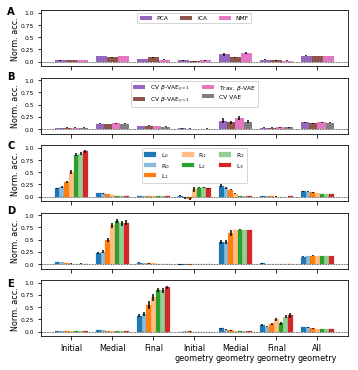

In [53]:
f, axes = plt.subplots(5, figsize=(5.5, 6), gridspec_kw={'hspace':.2})

models = ['pca', 'ica', 'nmf']
model_names = ['PCA', 'ICA', 'NMF']

x = np.arange(len(variables))
width = .8 / len(models)
for kk, model in enumerate(models):
    ax = axes[0]
    vals = np.zeros((len(variables), len(folds)))
    for ii, var in enumerate(variables):
        for jj, fold in enumerate(folds):
            r = linear_results[(model, fold, var)]
            vals[ii, jj] = normalized_acc_chance(r[-2], r[-1])
    label = model_names[kk]
    ax.bar(x + .1 + width * kk, vals.mean(axis=1),
           yerr=vals.std(axis=1)/np.sqrt(len(folds)),
           width=width, align='edge', label=label,
           color='C{}'.format(kk+4))

models = ['vae', 'imf', 'trav2', 'nvae']
model_names = [r'CV $\beta$-VAE$_{\gamma>1}$', r'CV $\beta$-VAE$_{\gamma<1}$',
               r'Trav. $\beta$-VAE', 'CV VAE']
width = .8 / len(models)
ax = axes[1]
for kk, model in enumerate(models):
    vals = np.zeros((len(variables), len(folds)))
    for ii, var in enumerate(variables):
        for jj, fold in enumerate(folds):
            r = vae_results[(model, fold, var)]
            vals[ii, jj] = normalized_acc_chance(r[-2], r[-1])
    label = model_names[kk]
    ax.bar(x + .1 + width * kk, vals.mean(axis=1),
           yerr=vals.std(axis=1)/np.sqrt(len(folds)),
           width=width, align='edge', label=label,
           color='C{}'.format(kk+4))



width = .8 / len(layers)
for kk, imf in enumerate(imfs):
    ax = axes[kk+2]
    for layer in layers:
        vals = np.zeros((len(variables), len(folds)))
        for ii, var in enumerate(variables):
            for jj, fold in enumerate(folds):
                r = results[(imf, fold, layer, var)]
                vals[ii, jj] = normalized_acc_chance(r[-2], r[-1])
        for ii, var in enumerate(variables):
            label = None
            if ii == 0:
                if (layer % 2) == 0:
                    label = r'L$_{}$'.format(layer // 2)
                else:
                    label = r'R$_{}$'.format(layer // 2)
            vs = vals[ii]
            p = ttest_1samp(vs, popmean=0.).pvalue
            edgecolor = 'C{}'.format(layer // 2)
            if p < .05:
                color = 'C{}'.format(layer // 2)
            else:
                color = 'C{}'.format(layer // 2)
            print(color)
            ax.bar(x[ii] + .1 + width * layer, vals.mean(axis=1)[ii],
                   yerr=vals.std(axis=1)[ii]/np.sqrt(len(folds)),
                   width=width, align='edge', label=label,
                   color=color, edgecolor=edgecolor, linewidth=.2,
                   alpha=1. / ((layer % 2) + 1))

for ax in axes:
    ax.set_xticklabels([])
    ax.set_xticks(x + .5)
    ax.axhline(0, 0, 1, ls='--', c='k', lw=.5)
    ax.set_ylim(-.1, 1.05)
    ax.set_yticks([0, .25, .5, .75, 1])
    ax.set_yticklabels([0., .25, .5, .75, 1.], fontsize=style.ticklabel_fontsize)
    ax.set_ylabel('Norm. acc.', fontsize=style.axis_label_fontsize, labelpad=0)

axes[0].legend(loc='upper center', ncol=3, fontsize=style.ticklabel_fontsize,
               labelspacing=.25)
axes[1].legend(loc='upper center', ncol=2, fontsize=style.ticklabel_fontsize,
               labelspacing=.25)
axes[2].legend(loc='upper center', ncol=3, fontsize=style.ticklabel_fontsize,
               labelspacing=.25)
axes[4].set_xticklabels(vnames, rotation=0, ha='center', fontsize=style.axis_label_fontsize)
x = .04
f.text(x, .87, 'A', **style.panel_letter_fontstyle)
f.text(x, .72, 'B', **style.panel_letter_fontstyle)
f.text(x, .56, 'C', **style.panel_letter_fontstyle)
f.text(x, .41, 'D', **style.panel_letter_fontstyle)
f.text(x, .24, 'E', **style.panel_letter_fontstyle)
f.tight_layout()
plt.savefig('dn_rep_cluster.pdf'.format(exp_name),
            dpi=300, bbox_inches="tight")
plt.savefig('dn_rep_cluster.png'.format(exp_name),
            dpi=300, bbox_inches="tight")

In [47]:
vals = []
for ii in range(7):
    r = results[('m', ii, 2, 'initial_geometry')]
    vals.append(normalized_acc_chance(r[-2], r[-1]))

In [48]:
vals

[-0.0022195338026426608,
 -0.022670494067854652,
 -0.029643850772009334,
 -0.014310011143041442,
 -0.0451503655339727,
 -0.015159361611976672,
 -0.003082467871200618]

In [64]:
from scipy.stats import wilcoxon, ttest_1samp, mode

In [51]:
wilcoxon(vals), ttest_1samp(vals, popmean=0.).pvalue

(WilcoxonResult(statistic=0.0, pvalue=0.017960477526078766),
 0.016552334067838164)

In [81]:
x = label_df['initial'].values
y =  label_df['all_geometry'].values

In [82]:
assignments = dict()
yhat = np.zeros_like(y)
for val in np.unique(x):
    idxs = x == val
    choice = mode(y[idxs]).mode
    yhat[idxs] = choice

In [83]:
np.mean(y == yhat)

0.11904761904761904